# K-Nearest Neighbors (KNN)

KNN is a supervised machine learning algorithm that can be used to solve both classification and regression problems.

It is a non-parametric, lazy learning algorithm. Non-parametric means that it does not make any assumptions about the underlying data distribution. Lazy learning means that it does not require any training data points for model generation; all training data is used in the testing phase. This makes training faster and the testing phase slower and costlier.

During the training phase, the KNN algorithm stores the dataset. When it receives new data, it classifies that data into a category that is most similar to the new data.

In [1]:
# Example of KNN classifier on IRIS data using seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [5]:
# split the data into X and y
X = df.drop('species', axis=1)
y = df['species']

In [6]:
# train-test split the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# create KNN model with 11 neighbors
model = KNeighborsClassifier(n_neighbors=11)

# fit the model on the training data
model.fit(X_train, y_train)

# predict the species for the test data
y_pred = model.predict(X_test)

In [9]:
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



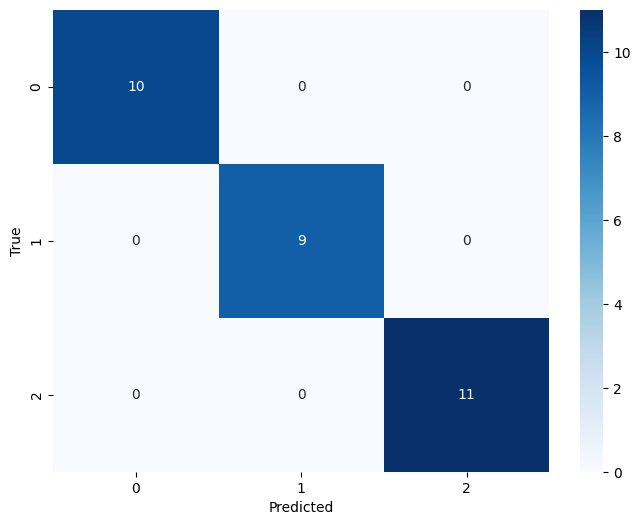

In [10]:
# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
# Regression problem on the tips dataset

# Load the dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
# split the data into X and y
X = tips.drop('tip', axis=1)
y = tips['tip']

In [14]:
tips.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [16]:
# encode the categorical columns using a for loop and LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])


In [17]:
# train-test split the data and run the model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN regression model
model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

In [18]:
# fit the model on the training data
model.fit(X_train, y_train)

# predict the target variable for the test data
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# print evaluation metrics
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Mean Squared Error: 0.8382265306122448
R2 Score: 0.3294034029001649
RMSE: 0.9155471209130881


In [19]:
# predict a specific value
prediction = model.predict([[45, 1, 0, 1, 1, 3]])
print(prediction)


[4.946]


c:\Users\Muhammad Bakhsh\.conda\envs\Machine\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
